
<h1 style="color:#ff6347; text-align:center;margin-bottom:20px"> Филтрирање на слика во фрекфенциски домен </h1>

 <div style="color:black"> За да филтрираме слика во фреквенциски домен потребно е да ја помножиме сликата во фреквенциски домен со филтерот (кернел) кој е исто така во фреквенциски домен.
 \begin{equation} I_{f,filt} = HI_f \end{equation}
 
 За таа цел потребно е да се вметне Octave функција која ќе креира “Band pass gaussian filter” во фреквенциски домен. Bandpass гаусовиот филтер во фреквенциски домен е дефиниран со равенката:

\begin{equation} H(i,j) = e^{\frac{d(i,j)^2}{f_h^2}} (1 - e^{\frac{d(i,j)^2}{f_l^2}}) \end{equation}

Каде што 𝑑(𝑖,𝑗) е евклидовото растојанието на даден пиксел од центарот на сликата, додека 𝑓ℎ и 𝑓𝑙 се праговите на високите и ниските фреквенции кои сакаме
да ги филтрираме.

Конверзија на 2D сликата од просторен во фреквенциски домен се прави со користење на Фуриева трансформација. Фуриевата трансформација е дефинирана
како:

\begin{equation} F(u,v) = \iint \limits_{-\infty}^{\infty} f(x,y)e^{-i2\pi(ux+vy)}dxdy   \end{equation}

А во дискретниот домен горната равенка може да биде преведена како:

\begin{equation} F(u,v) = \mathop{\sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty}} f[m,n]\cdot e^{-i2\pi(ux+vy)}dudv                          \end{equation}

Конверзија на 2D сликата од фреквенциски во просторен домен се прави со користење на инверзна Фуриева трансформација. Инверзната Фуриева
трансформација е дефинирана како:

\begin{equation} F(x,y) = \iint \limits_{-\infty}^{\infty} f(u,v) e^{-i2\pi(ux+vy)}dudv   \end{equation}

А во дискретниот домен горната равенка може да биде преведена како:

\begin{equation} F(x,y) = \mathop{\sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty}} f[m,n] \cdot e^{-i2\pi(xmu_0+ynv_0)}                        \end{equation}

<div>
   

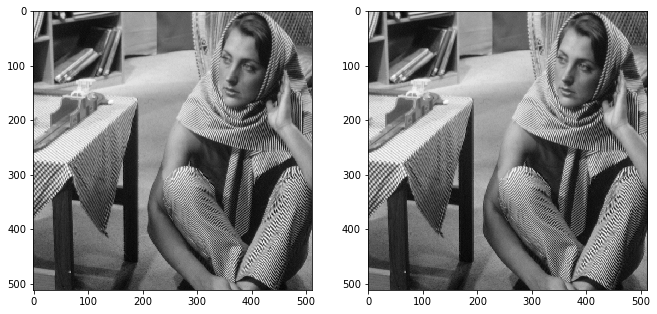

interactive(children=(FloatRangeSlider(value=(3.25, 7.75), description='Frequency cutoffs', max=10.0, min=1.0,…

<function __main__.f(Median_Size)>

In [13]:
# %%capture
# %matplotlib inline
from ipywidgets import interact, widgets
from IPython.display import display
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import warnings
import cv2
import numpy as np
from skimage.morphology import disk
from skimage.filters import rank
from skimage.color import rgb2gray
import skimage.data

figure_size = 9

def fourier(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return img, magnitude_spectrum

def gaus(img):
    result = gaussian_filter(img, sigma=1)
    return result

def inverse_fourier(img):
    img = img.astype('f')
    f_ishift = np.fft.ifftshift(img)
    img_back = cv2.idft(f_ishift)
    #img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    #img_back = np.abs(img_back)
    return img_back


def f(Median_Size):
#     img_median = cv2.GaussianBlur(image, (figure_size, figure_size),0)
    temp_image, magnitude_spectrum = fourier(image)
    gaussian_filter = gaus(temp_image)
    temp_image_2, magnitude_spetcrum_2 = inverse_fourier(gaussian_filter)
    ax_neu.imshow(temp_image_2, cmap="gray")
    fig.canvas.draw()
    display(fig)

image = plt.imread("https://homepages.cae.wisc.edu/~ece533/images/barbara.png")       
img_gray = rgb2gray(image)

fig = plt.figure(figsize=(11, 13))
ax_orig = fig.add_subplot(121) 
ax_neu = fig.add_subplot(122) 
xmin, xmax = 1, 10
ax_orig.imshow(img_gray, cmap="gray")
ax_neu.imshow(img_gray, cmap="gray")
interact(f, Median_Size=widgets.FloatRangeSlider(
    min=xmin,
    max=xmax,
    step= 1.0,
    description='Frequency cutoffs',
    readout=True,
    readout_format='.0f'))





